# 回帰

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('./products_dataset_cut5.csv')

In [2]:
df = df.drop('product_id', axis=1)
df = df.drop('product_category_name', axis=1)
df = df.dropna()
df

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,count_sold,decile
0,44.0,903.0,6.0,2600.0,50.0,10.0,30.0,527,1
1,54.0,245.0,1.0,1383.0,50.0,10.0,40.0,488,1
2,56.0,348.0,2.0,1550.0,30.0,22.0,30.0,484,1
3,59.0,341.0,2.0,1750.0,37.0,22.0,40.0,392,1
4,57.0,366.0,2.0,1650.0,30.0,22.0,30.0,388,1
...,...,...,...,...,...,...,...,...,...
32946,53.0,1143.0,4.0,1250.0,45.0,30.0,15.0,1,5
32947,34.0,1043.0,2.0,600.0,24.0,18.0,23.0,1,5
32948,51.0,641.0,1.0,500.0,20.0,12.0,13.0,1,5
32949,50.0,1953.0,1.0,2000.0,28.0,19.0,21.0,1,5


In [3]:
# カテゴリ変数はきいていなさそうなので、使わない
#df = pd.get_dummies(df, columns=['product_category_name'])

In [4]:

df['target'] = 0
for i, x in enumerate(df.decile):
    if x==1:
        df['target'][i] = 1 
    else:
        df['target'][i] = 0        

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [5]:
df

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,count_sold,decile,target
0,44.0,903.0,6.0,2600.0,50.0,10.0,30.0,527,1,1
1,54.0,245.0,1.0,1383.0,50.0,10.0,40.0,488,1,1
2,56.0,348.0,2.0,1550.0,30.0,22.0,30.0,484,1,1
3,59.0,341.0,2.0,1750.0,37.0,22.0,40.0,392,1,1
4,57.0,366.0,2.0,1650.0,30.0,22.0,30.0,388,1,1
...,...,...,...,...,...,...,...,...,...,...
32946,53.0,1143.0,4.0,1250.0,45.0,30.0,15.0,1,5,0
32947,34.0,1043.0,2.0,600.0,24.0,18.0,23.0,1,5,0
32948,51.0,641.0,1.0,500.0,20.0,12.0,13.0,1,5,0
32949,50.0,1953.0,1.0,2000.0,28.0,19.0,21.0,1,5,0


In [6]:
df.drop('decile', axis=1)

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,count_sold,target
0,44.0,903.0,6.0,2600.0,50.0,10.0,30.0,527,1
1,54.0,245.0,1.0,1383.0,50.0,10.0,40.0,488,1
2,56.0,348.0,2.0,1550.0,30.0,22.0,30.0,484,1
3,59.0,341.0,2.0,1750.0,37.0,22.0,40.0,392,1
4,57.0,366.0,2.0,1650.0,30.0,22.0,30.0,388,1
...,...,...,...,...,...,...,...,...,...
32946,53.0,1143.0,4.0,1250.0,45.0,30.0,15.0,1,0
32947,34.0,1043.0,2.0,600.0,24.0,18.0,23.0,1,0
32948,51.0,641.0,1.0,500.0,20.0,12.0,13.0,1,0
32949,50.0,1953.0,1.0,2000.0,28.0,19.0,21.0,1,0


In [7]:
'''
X=df.drop('target', axis=1)
y = df['target']
'''

"\nX=df.drop('target', axis=1)\ny = df['target']\n"

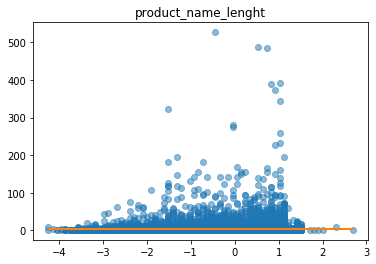

モデル関数の回帰変数 w1: 0.100
モデル関数の切片 w2: 3.434
y= 0.100x + 3.434
決定係数 R^2：  8.867746584273473e-05


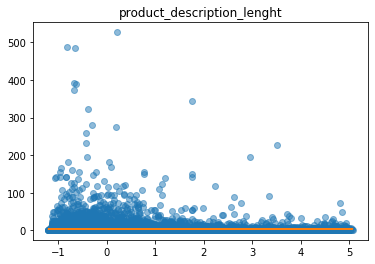

モデル関数の回帰変数 w1: 0.089
モデル関数の切片 w2: 3.434
y= 0.089x + 3.434
決定係数 R^2：  6.90743982652009e-05


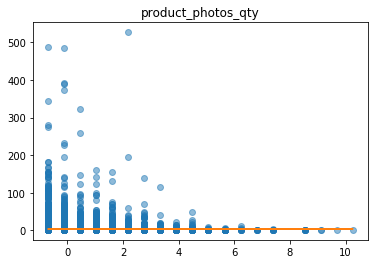

モデル関数の回帰変数 w1: 0.041
モデル関数の切片 w2: 3.434
y= 0.041x + 3.434
決定係数 R^2：  1.4827107650994265e-05


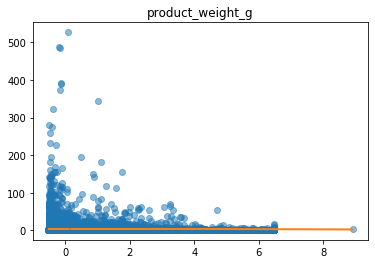

モデル関数の回帰変数 w1: -0.142
モデル関数の切片 w2: 3.434
y= -0.142x + 3.434
決定係数 R^2：  0.00017775357035820782


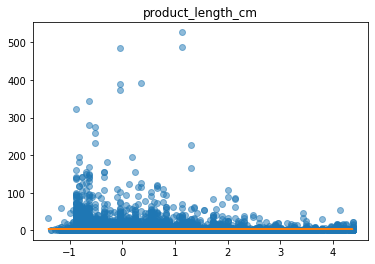

モデル関数の回帰変数 w1: -0.130
モデル関数の切片 w2: 3.434
y= -0.130x + 3.434
決定係数 R^2：  0.00014970582763607077


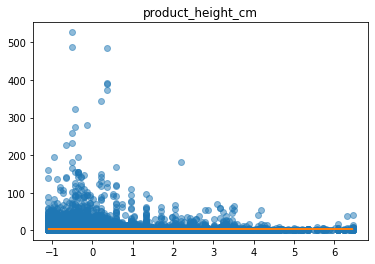

モデル関数の回帰変数 w1: -0.084
モデル関数の切片 w2: 3.434
y= -0.084x + 3.434
決定係数 R^2：  6.177342499258387e-05


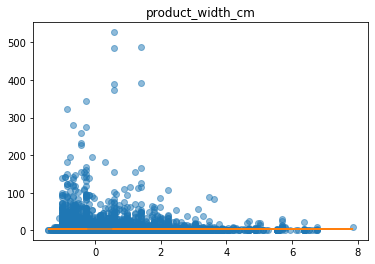

モデル関数の回帰変数 w1: -0.047
モデル関数の切片 w2: 3.434
y= -0.047x + 3.434
決定係数 R^2：  1.9780875357811034e-05


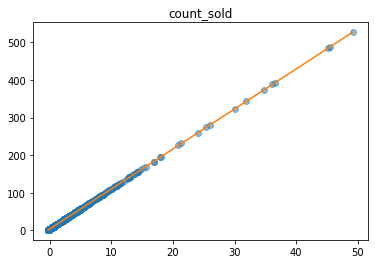

モデル関数の回帰変数 w1: 10.651
モデル関数の切片 w2: 3.434
y= 10.651x + 3.434
決定係数 R^2：  1.0


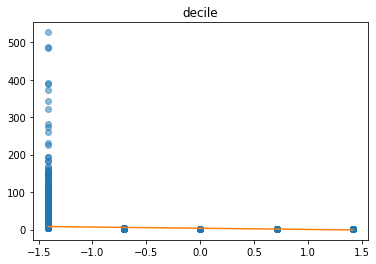

モデル関数の回帰変数 w1: -3.168
モデル関数の切片 w2: 3.434
y= -3.168x + 3.434
決定係数 R^2：  0.08847181988080688


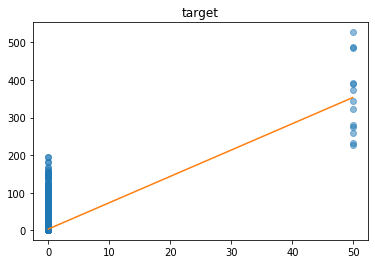

モデル関数の回帰変数 w1: 7.012
モデル関数の切片 w2: 3.434
y= 7.012x + 3.434
決定係数 R^2：  0.43332901116600364


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
from sklearn.preprocessing import StandardScaler

model = LinearRegression()
#X_columns = df.columns.to_list()
#print(X_columns)

# 各変数に対して回帰
#scaler=StandardScaler()
#
y = df['count_sold']
#y_scaled = pd.DataFrame(scaler.fit_transform(y), columns=y.columns)

#y = df['target']
for column in df.columns:
    X = df[[column]]
    
    scaler=StandardScaler()
    X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
    
    #X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8) # 学習データ:評価データ＝4:1
    model.fit(X_scaled, y)
    #y_pred = model.predict()
    plt.title(column)
    plt.plot(X_scaled, y, 'o', alpha=0.5)
    plt.plot(X_scaled, model.predict(X_scaled), linestyle="solid")
    plt.show()

    print('モデル関数の回帰変数 w1: %.3f' %model.coef_)
    print('モデル関数の切片 w2: %.3f' %model.intercept_)
    print('y= %.3fx + %.3f' % (model.coef_ , model.intercept_))
    print('決定係数 R^2： ', model.score(X_scaled, y))
    
    #plt.scatter(X, y)
    #lt.title(column)
    #plt.show()
    

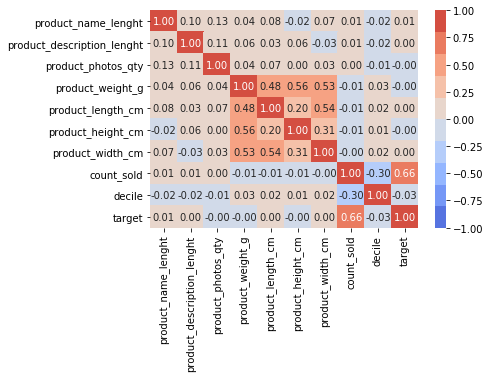

In [12]:
import seaborn as sns
sns.heatmap(df[df.columns].corr(), cmap= sns.color_palette('coolwarm', 10), annot=True,fmt='.2f', vmin = -1, vmax = 1)

In [ ]:
df = df.drop('decile', axis=1)
df = df.drop('count_sold', axis=1)


In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X=df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8) # 学習データ:評価データ＝4:1

tree = DecisionTreeClassifier(max_depth=5).fit(X_train, y_train)  #決定木の学習, 木の深さ=3

print("train data's accuracy:", tree.score(X_train, y_train))
print("test data's accuracy: ", tree.score(X_test, y_test))

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_scaled

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

# 各変数の分布の可視化
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20, 8), constrained_layout=True)
for i, (c, v) in enumerate(X_scaled.iteritems()):
    a = ax[i//3, i%3]
    a.hist(v[y == 0], label='0', bins=30, range=(v.min(), v.max()), alpha=0.5, color='tab:blue')
    a.hist(v[y == 1], label='1', bins=30, range=(v.min(), v.max()), alpha=0.5, color='tab:orange')
    a.set_title(c)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
model.fit(X_scaled, y)

In [ ]:
print(model.coef_)
print(model.intercept_)
print(model.score(X_scaled, y))

from sklearn.preprocessing import StandardScaler
import pandas as pd

X = cancer.data
y = cancer.target

scaler=StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled